Fernando Cerriteño Magaña A01702790

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=de5e34c4879e34c0681bf83c62ac3cf6e4f7f1d26ac43317c5e70104fe9e452c
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

In [3]:
####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

In [4]:
df = pd.read_csv('/content/Country-data.csv')

points = df.iloc[:,1:].to_numpy()
label = df.country.to_numpy()

 k-medias sobre el conjunto de datos para el agrupamiento de los países de la base de datos.

----- K-means -----
Labels:  [0 7 7 0 4 4 0 1 1 7 8 3 0 4 7 1 7 0 0 0 7 7 4 5 7 0 0 0 0 1 0 0 0 4 7 7 0
 0 0 7 0 4 8 8 1 7 7 7 0 3 0 4 0 1 1 7 0 0 1 0 8 7 0 0 0 0 0 4 1 0 7 7 7 1
 8 8 7 1 7 4 0 0 5 0 0 4 4 0 0 4 4 9 7 0 0 4 7 0 8 0 7 0 0 0 7 0 0 0 7 0 1
 8 0 0 6 3 0 7 0 7 0 4 8 2 4 4 0 0 3 0 7 4 0 5 4 8 0 7 8 8 7 7 0 7 1 6 0 0
 7 0 0 0 7 4 7 0 0 5 1 1 4 0 0 4 0 0 0]
Centers:  [[7.06542857e+01 2.98571286e+01 6.24057143e+00 4.66895129e+01
  3.34218571e+03 1.03349429e+01 6.33071429e+01 4.17557143e+00
  1.50977143e+03]
 [4.31333333e+00 4.43400000e+01 1.08486667e+01 4.09933333e+01
  4.14533333e+04 1.14273333e+00 8.07466667e+01 1.81866667e+00
  4.68000000e+04]
 [9.00000000e+00 6.23000000e+01 1.81000000e+00 2.38000000e+01
  1.25000000e+05 6.98000000e+00 7.95000000e+01 2.07000000e+00
  7.03000000e+04]
 [3.67500000e+01 6.76500000e+01 4.12750000e+00 4.60000000e+01
  4.13750000e+04 1.62850000e+01 7.20250000e+01 3.30750000e+00
  1.91000000e+04]
 [1.13363636e+01 4.75227273e+01 6.53681818e+00 4.6900

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


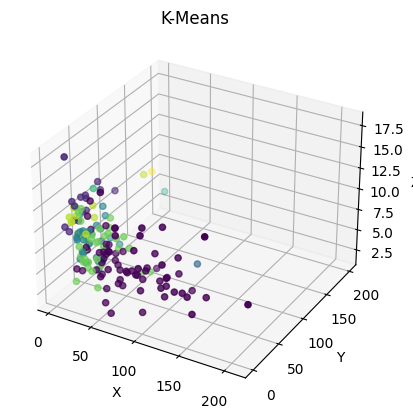

In [5]:
####### K-means #######
print('----- K-means -----')

kmeans = KMeans(n_clusters=10).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(points, clustering_labels, 'K-Means')

Número optimo de parametros con metodo del codo, y metodo de silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

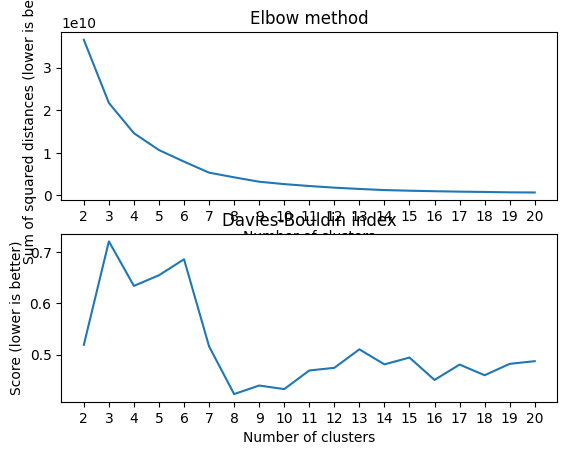

In [11]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))


fig, axs = plt.subplots(2)

axs[0].plot(ks, sum_of_squared_distances)
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Sum of squared distances (lower is better)')
axs[0].set_title('Elbow method')
axs[0].set_xticks(ks)

axs[1].plot(ks, dbscore)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Score (lower is better)')
axs[1].set_title('Davies-Bouldin index')
axs[1].set_xticks(ks)

Agrupamiento por otros metodos

----- Dendrogram plot -----


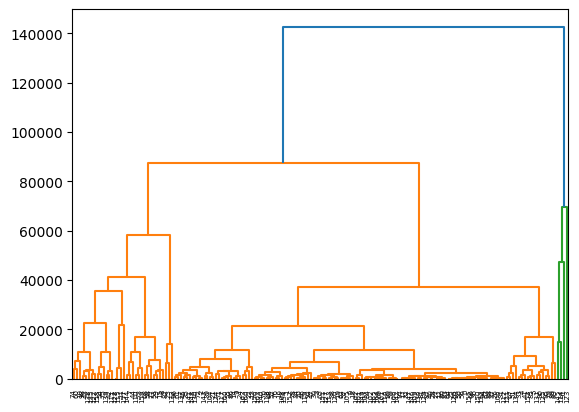

In [12]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(points, 'complete')
labelList = range(1, 11)

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()

----- Aglomerative clustering -----
Labels:  [2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


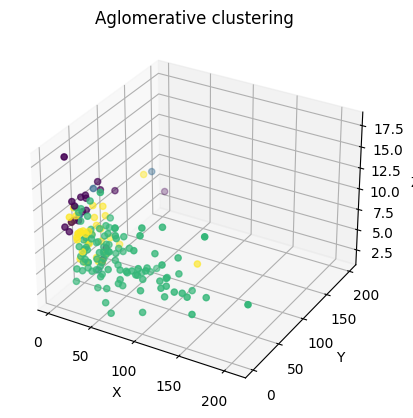

In [18]:
####### Aglomerative clustering #######
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(points)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Labels:  [3 3 3 3 3 3 3 6 6 3 0 0 3 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 6 3 3 3 3 0 3 3 3 6 6 3 3 3 6 3 0 3 3 3 3 3 3 3 6 3 3 3 3 6
 0 6 3 6 3 3 3 3 2 3 3 3 3 3 3 0 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 6
 0 3 3 1 0 3 3 3 3 3 3 0 5 3 3 3 3 0 3 3 3 3 2 0 0 3 3 0 0 3 3 3 3 6 1 3 3
 3 3 3 3 3 3 3 3 3 7 6 6 3 3 3 3 3 3 3]


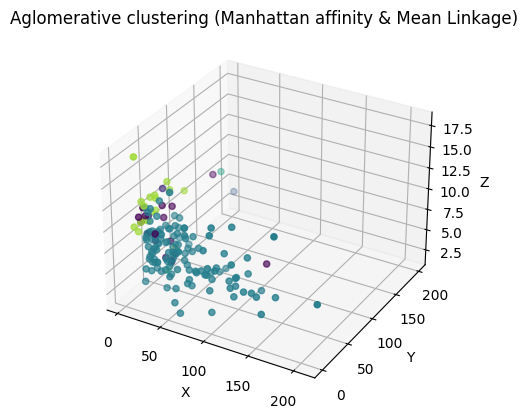

In [19]:
# Using custom distance matrix
dist = pairwise_distances(points, metric = 'l1')
agl = AgglomerativeClustering(n_clusters=8, linkage = 'average', affinity = 'precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

Mapa autoorganizado con MiniSom

In [7]:
# Crear un mapa autoorganizado (SOM)
# Especifica el tamaño de la cuadrícula SOM y otros hiperparámetros
som_shape = (10, 10)  # Tamaño de la cuadrícula SOM (10x10)
sigma = 1.0  # Valor de sigma para la función de vecindad
learning_rate = 0.5  # Tasa de aprendizaje inicial

In [8]:
# Crear y entrenar el SOM
data = points
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(data)
som.train_random(data, 1000)  # Entrenar durante 1000 iteraciones con datos aleatorios

In [9]:
# Calcular la matriz de distancias entre las neuronas en el SOM
distance_map = som.distance_map().T  # Transponer para que coincida con las dimensiones del SOM

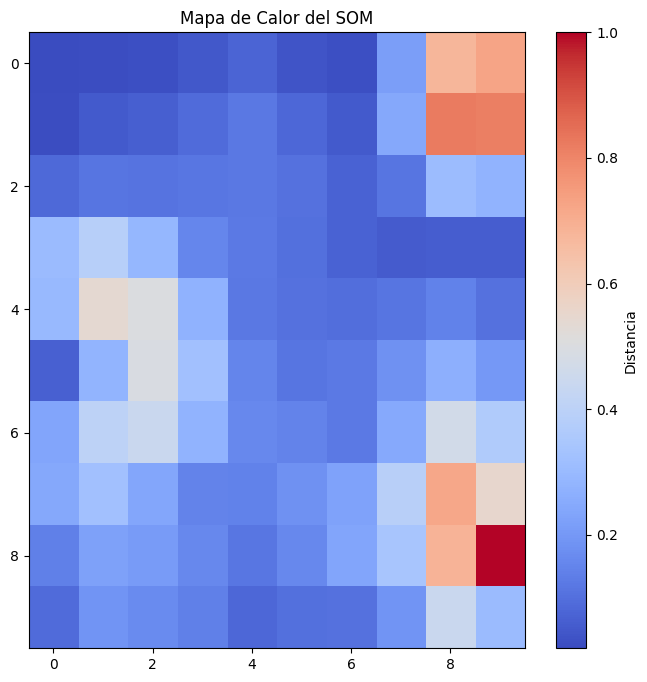

In [20]:
# Visualizar el mapa de calor
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Distancia')
plt.title('Mapa de Calor del SOM')
plt.grid(False)
plt.show()

De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

**Analizando las diferentes grpaficas obtenidas se puede observar que en la mayoria de tecnicas existe un grupo que cuenta con más dominio que los demas, otra cosa a tomar en cuenta es que los datos se encuentran muy cercanos entre diferentes grupos, lo cual puede llegar a causar algunos problemas al momento de agrupar.**